In [1]:
import numpy as np
import cv2
import PIL.Image as Image

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

import keras
from keras import layers
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

/Users/ditya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
conv_base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

2025-10-13 13:07:04.421501: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-10-13 13:07:04.421519: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-13 13:07:04.421525: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
I0000 00:00:1760341024.421558  727106 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1760341024.421592  727106 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [4]:
model = Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,028,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,286,659 (39.24 MB)

 Trainable params: 10,252,547 (39.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [6]:
conv_base.trainable = False

In [7]:
import pathlib
data_dir = pathlib.Path('./garbage-dataset');

In [8]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('garbage-dataset/paper/paper_926.jpg'),
 PosixPath('garbage-dataset/paper/paper_2718.jpg'),
 PosixPath('garbage-dataset/paper/paper_1205.jpg'),
 PosixPath('garbage-dataset/paper/paper_1563.jpg'),
 PosixPath('garbage-dataset/paper/paper_2042.jpg')]

In [9]:
image_cnt = len(list(data_dir.glob('*/*.jpg')))
print(image_cnt)

4670


In [10]:
paper = list(data_dir.glob('paper/*'))
paper[:5]

[PosixPath('garbage-dataset/paper/paper_926.jpg'),
 PosixPath('garbage-dataset/paper/paper_2718.jpg'),
 PosixPath('garbage-dataset/paper/paper_1205.jpg'),
 PosixPath('garbage-dataset/paper/paper_1563.jpg'),
 PosixPath('garbage-dataset/paper/paper_2042.jpg')]

In [11]:
garbage_images = {
    'paper': [img for img in data_dir.glob('paper/*') if img.name.startswith('.') is False],
    'metal': [img for img in data_dir.glob('metal/*') if img.name.startswith('.') is False],
    'plastic': [img for img in data_dir.glob('plastic/*') if img.name.startswith('.') is False]
}

In [12]:
garbage_labels = {
    'paper': 0,
    'metal': 1,
    'plastic': 2
}

In [13]:
garbage_images['metal'][:5]

[PosixPath('garbage-dataset/metal/metal_2150.jpg'),
 PosixPath('garbage-dataset/metal/metal_2622.jpg'),
 PosixPath('garbage-dataset/metal/metal_2144.jpg'),
 PosixPath('garbage-dataset/metal/metal_358.jpg'),
 PosixPath('garbage-dataset/metal/metal_1465.jpg')]

In [14]:
img = cv2.imread(str(garbage_images['paper'][0]))

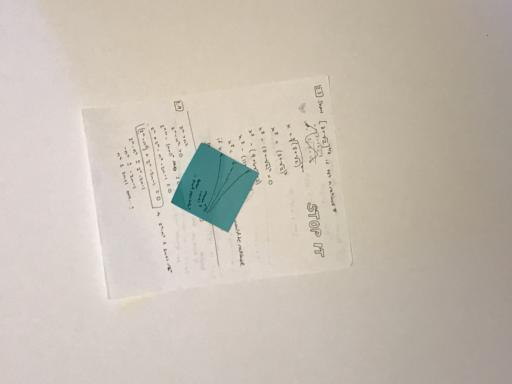

In [15]:
Image.open(str(garbage_images['paper'][0]))

In [16]:
print(img.shape)

(384, 512, 3)


In [17]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [18]:
x, y = [], []

for garbage_name, images in garbage_images.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224))
    x.append(resized_img)
    y.append(garbage_labels[garbage_name])

In [19]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
x = np.array(x)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [22]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [23]:
x[0].shape

(224, 224, 3)

In [24]:
IMAGE_SHAPE = (224, 224)
IMAGE_SHAPE+(3, )

(224, 224, 3)

In [25]:
x0_resized = cv2.resize(x[0], IMAGE_SHAPE)


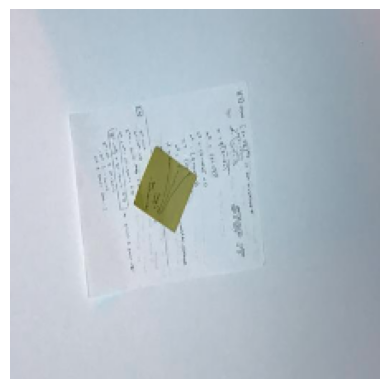

In [26]:
plt.axis('off')
plt.imshow(x[0])

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [28]:
model.fit(x_train_scaled, y_train, epochs=3)

Epoch 1/3


2025-10-13 13:07:18.290573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - acc: 0.7455 - loss: 16.2389
Epoch 2/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - acc: 0.9187 - loss: 2.6235
Epoch 3/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - acc: 0.9616 - loss: 1.0741


In [29]:
model.evaluate(x_test_scaled, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - acc: 0.9139 - loss: 2.5146


[2.4101336002349854, 0.9171648025512695]

In [30]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print("✅ Test Accuracy:", test_acc)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - acc: 0.9139 - loss: 2.5146
✅ Test Accuracy: 0.9171648025512695


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step


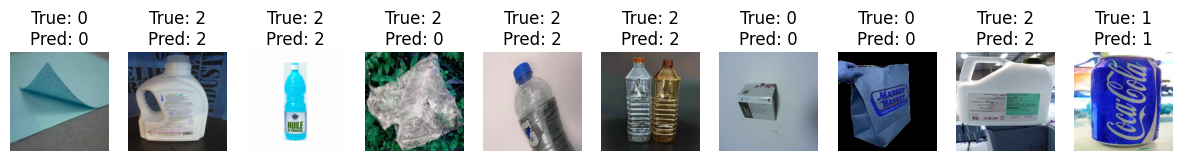

In [31]:
y_pred_probs = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

def show_predictions(images, labels, preds, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        idx = np.random.randint(0, len(images))  # pick random test image
        plt.subplot(1, n, i+1)
        plt.imshow(images[idx])
        plt.axis("off")
        plt.title(f"True: {labels[idx]}\nPred: {preds[idx]}")

show_predictions(x_test, y_test, y_pred, n=10)

In [32]:
image_to_check = pathlib.Path('/Users/ditya/Downloads/paper.jpeg');
image_to_check

PosixPath('/Users/ditya/Downloads/paper.jpeg')

In [33]:
img = cv2.imread(str(image_to_check))

In [34]:
print(img.shape)

(1156, 868, 3)


In [35]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [36]:
img = img / 255

In [37]:
img_batch = np.expand_dims(img, axis=0)

In [38]:
img = cv2.imread(str(image_to_check))
img = cv2.resize(img, (224, 224))
img = img / 255.0

# add batch dimension
img_batch = np.expand_dims(img, axis=0)   # shape becomes (1,224,224,3)

# predict
y_pred_probs = model.predict(img_batch)
y_pred = np.argmax(y_pred_probs, axis=1)[0]

if y_pred == 1 :
    print("Predicted class is metal")
elif y_pred == 2 :
    print("Predicted class plastic")
else :
    print("Predicted class paper")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class paper


In [40]:
model.save("garbage_mobilenet.h5")
